# LOAD MODELS

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from nidocr.model import OCR
from nidocr.utils import *
from nidocr.data  import card
ocr=OCR("models")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Segmentation Models: using `tf.keras` framework.
#LOG     :Extractor Loaded
#LOG     :Extractor Initialized
#LOG     :Loaded Detection Model,craft
#LOG     :Detector Loaded
#LOG     :Detector Initialized
#LOG     :Label len:80
#LOG     :Vocab len:1504
#LOG     :Pad Value:1506
#LOG     :Start End:1505
#LOG     :encm loaded
#LOG     :seqm loaded
#LOG     :posm loaded
#LOG     :fusm loaded
#LOG     :Recognizer Loaded


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :Recognizer Initialized
#LOG     :Face Matcher Initialized


# Start

#LOG     :------------------------------------------------
#LOG     :Data
#LOG     :------------------------------------------------


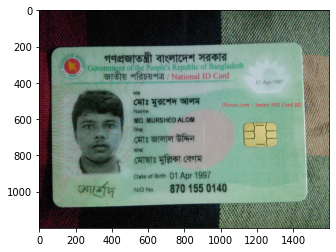

In [3]:
img=cv2.imread("tests/example.jpg")
display_data("Data",img)

In [5]:
data=ocr.extract("tests/example.jpg",shift_x_max=0)
data

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'card_type': 'smart',
 'Bangla Name': 'মোঃ মুরশোদ আলাম',
 'English Name': 'md murshed alom',
 'Fathers Name': 'মোঃ জালাল উদ্দিন',
 'Mothers Name': 'মোছাঃ মুল্লিকা বেগাম.',
 'Date of Birth': '01 apr 1997',
 'ID No.': '870 155 0140',
 'image': b'\xcf+q\xcf\x1c\xf3\xc6\xac/\xb79+\x83)\xe7y\x18\x07m\x92\xa1l\xe9\xe0\r\x82\x18\x9e\x05\xdbe\xd6]\x91\xb4\xcb\\\xa1\xd4$4\x05)s\x8ba\x10\x90$$\x8b\rc\x8cir\x13-1X8\x15\xcc\x05\x93w#@\xfd\xff_\xb5\xd3\x8f\xb7\xe3\xff\xf6\xd3Mt\xf7N8\xd7\xdd\xfe\xf3\x8dt\xfb\xef\xb5\xdb\x8d\xbf\xffM\xb9\xd3\x8d\xf9\xf3\xef\xf4\xdb\x82u,\x90\xfb\xe3n8\xd0\x0f',
 'sign': b'\xcb;\xe4\xb7;\xac\xb6\xeb\xde\x85Y\x9a\xc6\x18\xaa{\x18\xe1\xc6H-\x8e|\xad\xa3\x1bj\xc6\xc9\xab\x96\xfc\xeb\x9e\xb8\xe0\x91\xd8h\x86\\(\xaf9\xb2\x8a\xf6\xe5nK\xe0\xa2\x0bd\xa6[\'\x87\t\xb2\x92\xb9\xa6\xc2\xecp\x9eI\x9d\x86\x880\xcf\x0b\xae\x93\t\xb2\xa6L&\xc6l\xe0\xba\xba\xaa\xa7:p\x9e\xa8\xac\x86\xbc\xa7\xc7\x1bm\xb2\x8a/\xb79*\xc3\x1c\xed\xb6\xdbj\xbak\xae\xc2\xfb\xe6\x96I-\xbe\x8a\xa5\xa29\xaa